<a href="https://colab.research.google.com/github/MohamedIbrahim2311/imageProcessing/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python numpy

In [ ]:
import cv2
import numpy as np
import os
from pathlib import Path
from google.colab import files
from IPython.display import Image, display

SUPPORTED_FORMATS = {'.jpg', '.jpeg', '.png', '.tif', '.tiff'}

def load_image(image_path: str) -> np.ndarray:
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")

    ext = os.path.splitext(image_path)[1].lower()
    if ext not in SUPPORTED_FORMATS:
        raise ValueError(f"Unsupported file format: {ext}. Supported formats: {SUPPORTED_FORMATS}")

    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Failed to load image: {image_path}")

    return image

def save_image(image: np.ndarray, output_path: str) -> None:
    ext = os.path.splitext(output_path)[1].lower()
    if ext not in SUPPORTED_FORMATS:
        raise ValueError(f"Unsupported output format: {ext}. Supported formats: {SUPPORTED_FORMATS}")

    cv2.imwrite(output_path, image)

def adjust_brightness_contrast(image: np.ndarray, brightness: float = 0, contrast: float = 1) -> np.ndarray:
    brightness = np.clip(brightness, -100, 100)
    contrast = np.clip(contrast, 0, 3)

    adjusted = cv2.convertScaleAbs(image, alpha=contrast, beta=brightness)
    return adjusted

def apply_gaussian_blur(image: np.ndarray, kernel_size: int = 5) -> np.ndarray:
    if kernel_size % 2 == 0 or kernel_size <= 0:
        raise ValueError("Kernel size must be positive and odd")

    blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    return blurred

def apply_canny_edge_detection(image: np.ndarray, low_threshold: int = 100, high_threshold: int = 200) -> np.ndarray:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, low_threshold, high_threshold)
    return edges

def apply_non_local_means_denoising(image: np.ndarray, h: float = 10) -> np.ndarray:
    denoised = cv2.fastNlMeansDenoisingColored(image, None, h, h, 7, 21)
    return denoised

def extract_sift_features(image: np.ndarray) -> tuple:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    return keypoints, descriptors

In [ ]:
uploaded = files.upload()
input_image_path = "input_image.jpg"

for filename in uploaded.keys():
    with open(input_image_path, 'wb') as f:
        f.write(uploaded[filename])
    print(f"Uploaded and saved as {input_image_path}")

Saving WhatsApp Image 2025-05-26 at 12.40.57 PM.jpeg to WhatsApp Image 2025-05-26 at 12.40.57 PM.jpeg
Uploaded and saved as input_image.jpg


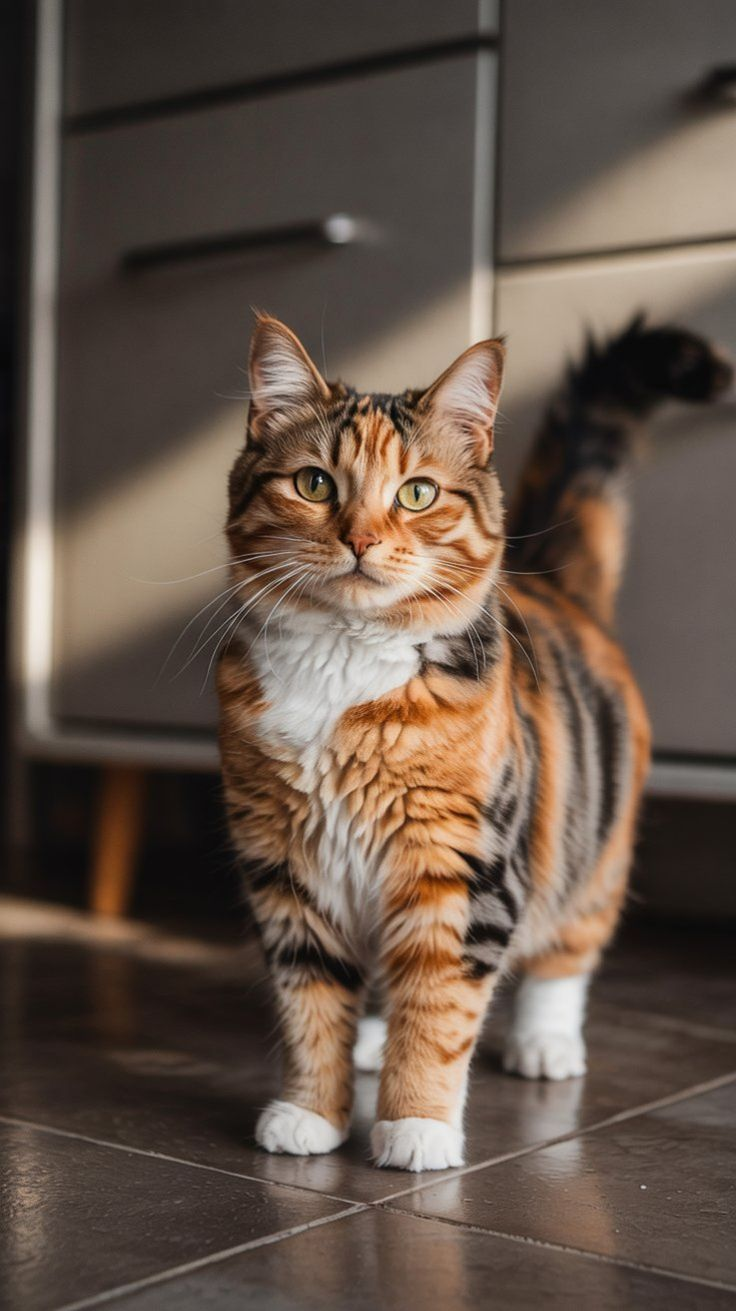

Original Image


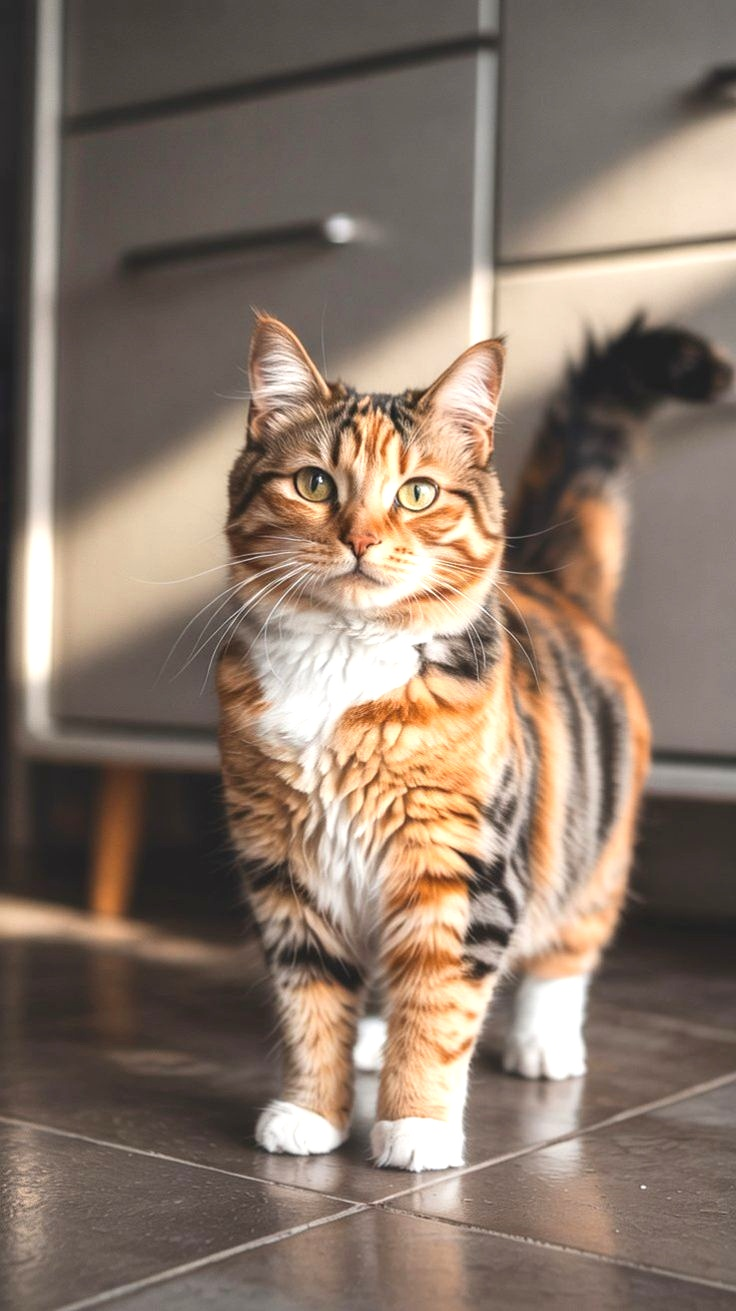

Brightness and Contrast Adjusted


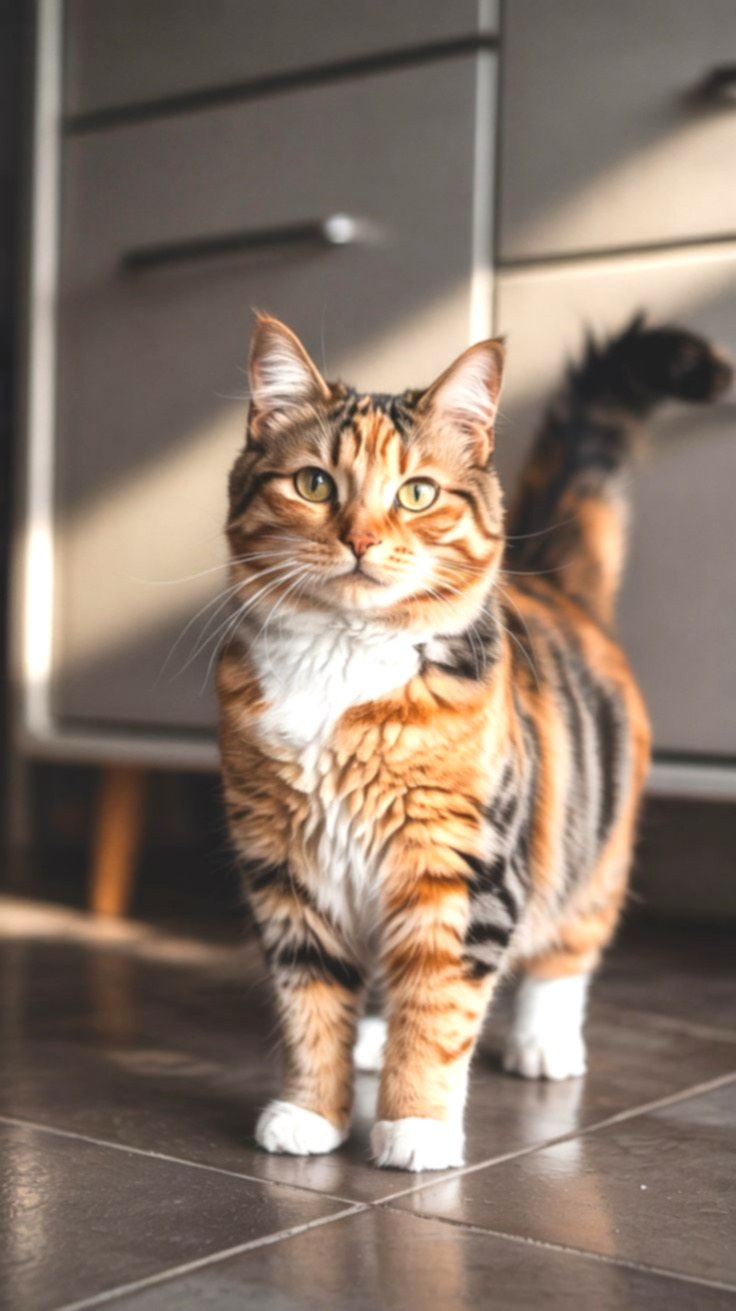

Gaussian Blur Applied


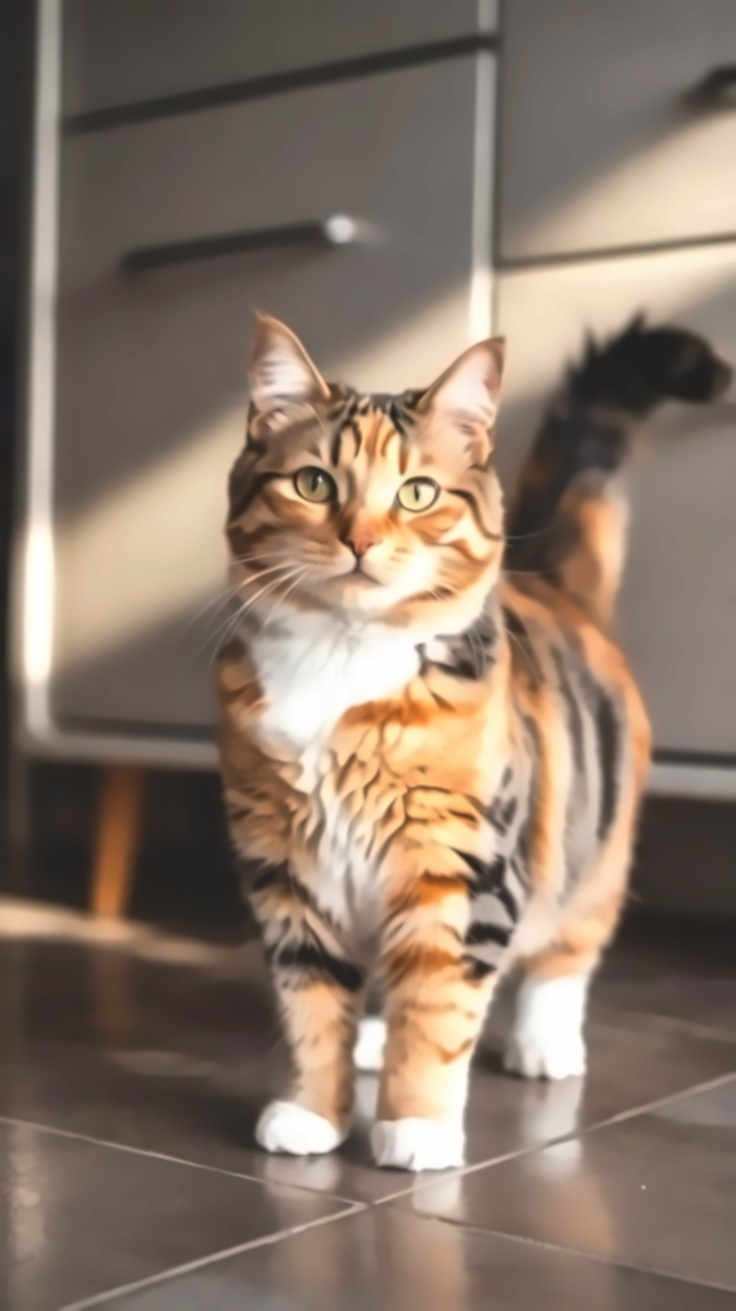

Non-local Means Denoising Applied


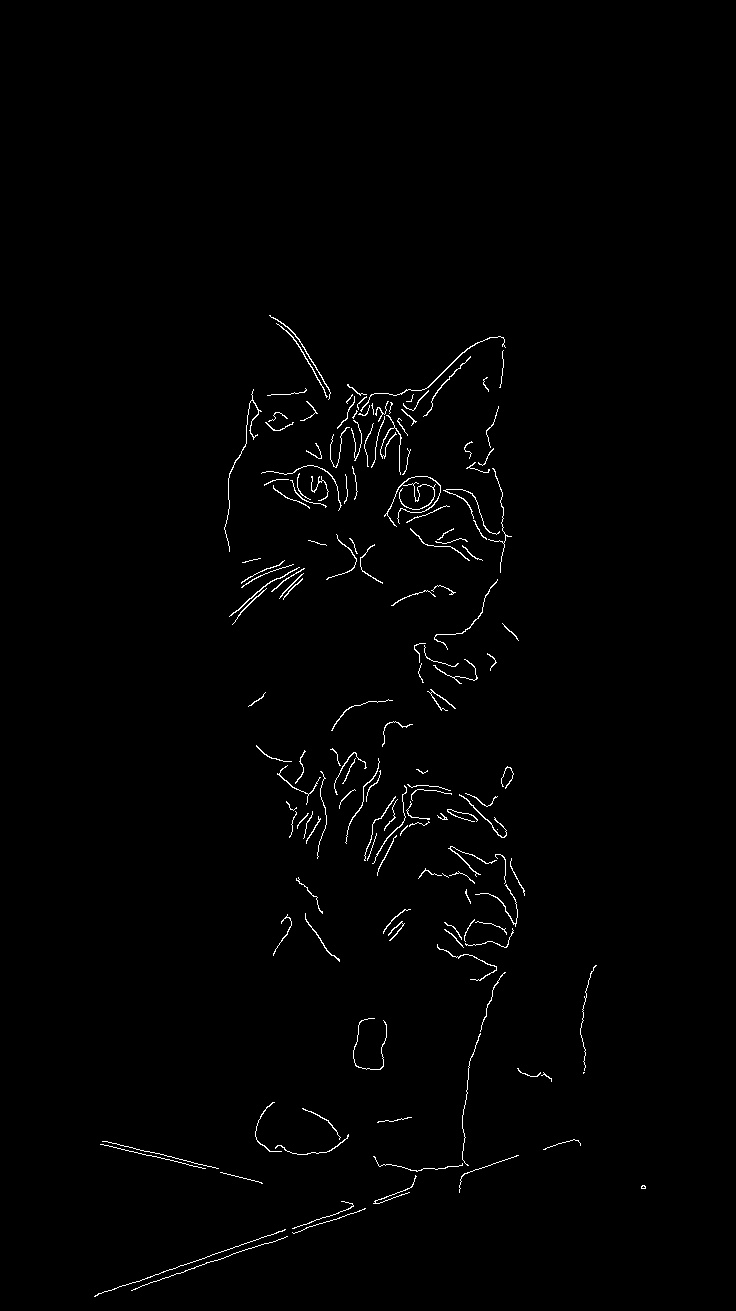

Canny Edge Detection Applied
Extracted 555 SIFT keypoints


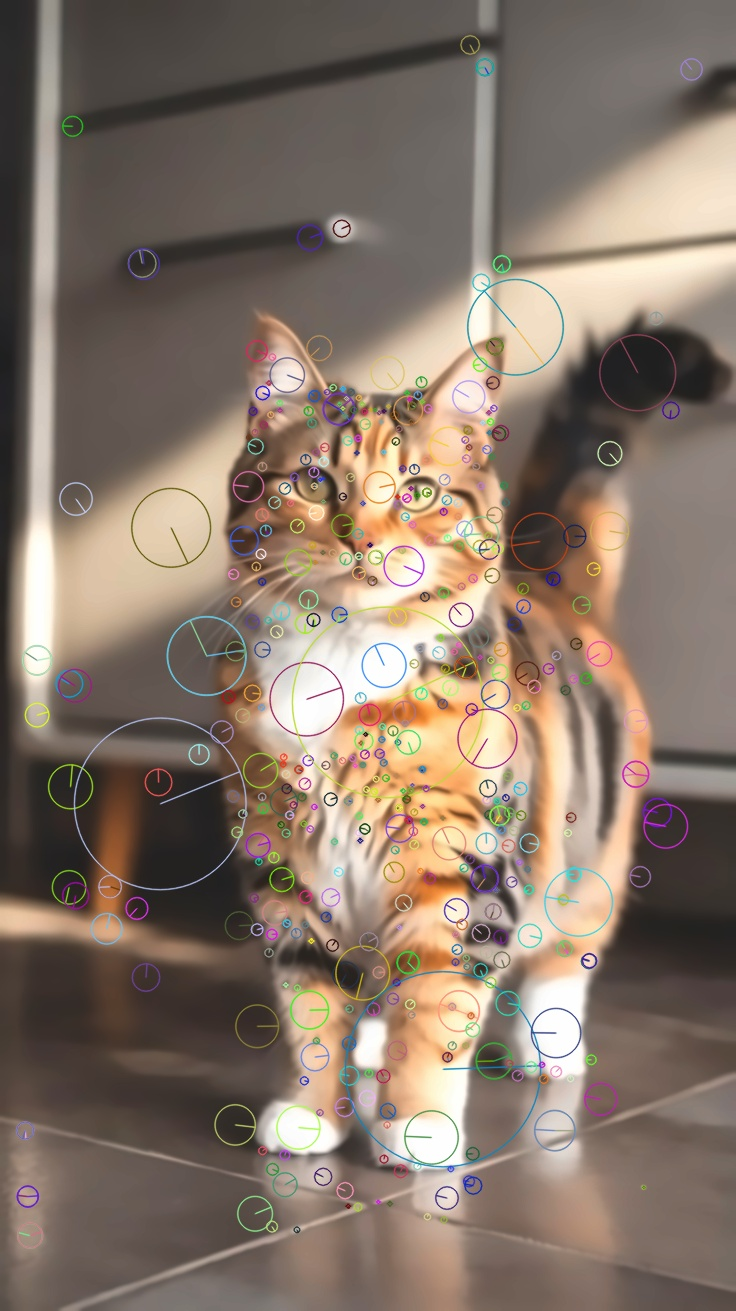

SIFT Keypoints Visualized
All processed images saved in processed_images


In [ ]:
output_dir = "processed_images"
os.makedirs(output_dir, exist_ok=True)

try:
    image = load_image(input_image_path)
    display(Image(input_image_path))
    print("Original Image")

    bright_contrast = adjust_brightness_contrast(image, brightness=20, contrast=1.2)
    bright_contrast_path = os.path.join(output_dir, "bright_contrast.jpg")
    save_image(bright_contrast, bright_contrast_path)
    display(Image(bright_contrast_path))
    print("Brightness and Contrast Adjusted")

    blurred = apply_gaussian_blur(bright_contrast, kernel_size=5)
    blurred_path = os.path.join(output_dir, "blurred.jpg")
    save_image(blurred, blurred_path)
    display(Image(blurred_path))
    print("Gaussian Blur Applied")

    denoised = apply_non_local_means_denoising(blurred)
    denoised_path = os.path.join(output_dir, "denoised.jpg")
    save_image(denoised, denoised_path)
    display(Image(denoised_path))
    print("Non-local Means Denoising Applied")

    edges = apply_canny_edge_detection(denoised)
    edges_path = os.path.join(output_dir, "edges.jpg")
    save_image(edges, edges_path)
    display(Image(edges_path))
    print("Canny Edge Detection Applied")

    keypoints, descriptors = extract_sift_features(denoised)
    print(f"Extracted {len(keypoints)} SIFT keypoints")

    keypoint_image = cv2.drawKeypoints(
        denoised, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )
    keypoint_path = os.path.join(output_dir, "keypoints.jpg")
    save_image(keypoint_image, keypoint_path)
    display(Image(keypoint_path))
    print("SIFT Keypoints Visualized")

    print(f"All processed images saved in {output_dir}")

except (FileNotFoundError, ValueError) as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"Unexpected error: {e}")